Statistical Analysis of HMP and IBD Datasets ouputted by QIIME1 and QIIME2

In [159]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu 
from scipy.spatial.distance import cdist

Preliminary Data Description 

In [160]:
#import HMP and IBD datasets
hmp_data = pd.read_csv("hmp_data_unnormalized.csv")
hmp_data.head()

,Patient ID,UncM5880,GFKSpe45,Unc02jig,HJ3Omni3,GWMAdo11,HKIVag12,GWMSpeci,Unc01vg1,Unc02374,...,Unc050mf,Unc054uj,Mx8Bact3,Unc02q5c,F1NS3559,GFUMa342,JnqAnth2,Unc02wri,Unc05mrd,Label
0,SRS011061,0.000000,0,0.0,0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,0.000005,Healthy
1,SRS011084,0.000000,0,0.0,0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,0.000013,Healthy
2,SRS011134,0.000004,0,0.0,0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,0.000049,Healthy
3,SRS011239,0.000003,0,0.0,0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,0.000000,Healthy
4,SRS011271,0.000000,0,0.0,0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,0.000000,Healthy


In [161]:
ibd_data = pd.read_csv("ibd_data_unnormalized.csv")
ibd_data.head()

,Patient ID,Unc02eb1,UncPa167,Unc02q5c,F1NS3559,Unc004zz,LcbReu47,Unc81447,Unc64172,Unc75554,...,Unc0340t,Unid2481,Unc03hrh,Unc02jig,H4SFili3,I6LElk91,Unc03q4b,UncO2108,HQDYunn7,HKIVag12
0,206646,0,156,0,0,0,0,0,3845,0,...,0,0,0,0,5,0,0,0,0,0
1,224324,0,0,0,0,0,0,0,3010,0,...,0,0,0,0,0,0,0,0,0,0
2,206619,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,224326,0,0,0,0,0,0,0,3822,0,...,0,0,0,0,4,0,0,0,0,0
4,206624,0,0,0,0,0,0,0,25,0,...,0,0,0,0,0,0,0,0,50,0


In [186]:
#Compare OTUs to make sure they are the same 
hmp_header = set(hmp_data.columns[1:121])
ibd_header = set(ibd_data.columns[1:])

only_in_hmp = hmp_header - ibd_header
only_in_ibd = ibd_header - hmp_header

print("Only in HMP file: ", only_in_hmp)
print("Only in IBD file: ", only_in_ibd)

Only in HMP file:  set()
Only in IBD file:  {'Shannon_Index'}


In [163]:
#Missing values 
missing_vals_hmp, missing_vals_ibd = hmp_data.isna().sum(), ibd_data.isna().sum()
print(missing_vals_hmp, missing_vals_ibd)

Patient ID    0
UncM5880      0
GFKSpe45      0
Unc02jig      0
HJ3Omni3      0
             ..
GFUMa342      0
JnqAnth2      0
Unc02wri      0
Unc05mrd      0
Label         0
Length: 122, dtype: int64 Patient ID    0
Unc02eb1      0
UncPa167      0
Unc02q5c      0
F1NS3559      0
             ..
I6LElk91      0
Unc03q4b      0
UncO2108      0
HQDYunn7      0
HKIVag12      0
Length: 121, dtype: int64


Total Sum Abundances Graph 

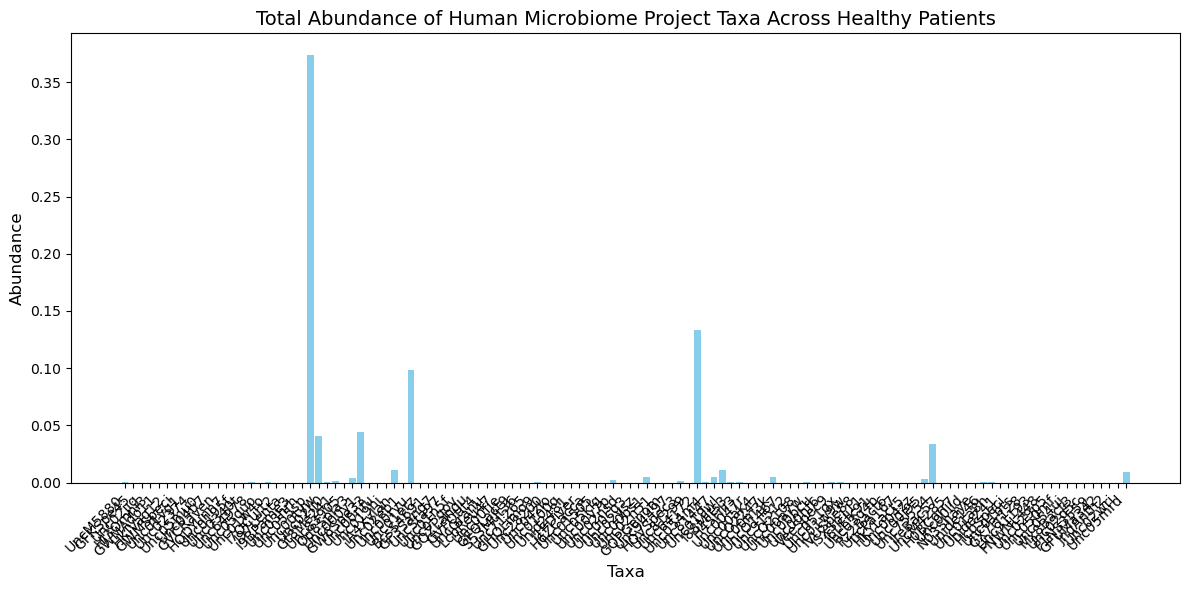

In [164]:
#Sum taxa abundance
taxa_sums_hmp = hmp_data.iloc[:,1:121].sum(axis=0)  

plt.figure(figsize=(12, 6))
plt.bar(taxa_sums_hmp.index, taxa_sums_hmp.values, color="skyblue")

#Labels and title
plt.title("Total Abundance of Human Microbiome Project Taxa Across Healthy Patients", fontsize=14)
plt.xlabel("Taxa", fontsize=12)
plt.ylabel("Abundance", fontsize=12)

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [165]:
#Outputting features with definite spikes 
spiked_totals_hmp = taxa_sums_hmp[taxa_sums_hmp > 0]
if not spiked_totals_hmp.empty: 
    sorted_vals_hmp = spiked_totals_hmp.sort_values(ascending = False)
    print(sorted_vals_hmp, sorted_vals_hmp.shape)


Unc055sp    3.739010e-01
Unc64172    1.336438e-01
Unc00rvu    9.809747e-02
Unc000y1    4.384707e-02
Unc00tyw    4.038895e-02
Unc75554    3.397765e-02
Unc019wl    1.105182e-02
IA4Xylan    1.092711e-02
Unc05mrd    8.926086e-03
Unc00bs1    5.254399e-03
Unc00m3k    4.700788e-03
Unc81447    4.583542e-03
Od8Spla3    4.368932e-03
Unc00j95    3.127777e-03
Unc00v7p    1.974959e-03
HQVSpec3    1.367779e-03
Gt8Me241    1.012600e-03
Unide146    5.466600e-04
I88Mits3    4.372590e-04
VeeSpec9    4.329190e-04
Unc054m4    4.109650e-04
GHQLimo9    3.429580e-04
Unc051gx    3.212540e-04
UncM5880    3.000860e-04
Unc01w4o    2.939740e-04
Unc02lj0    2.578500e-04
H4SFili3    2.001550e-04
Unc01a8h    1.844500e-04
Unc00a7w    1.672370e-04
Unc64978    1.197810e-04
Unc02ysz    1.033120e-04
Unc01505    9.635000e-05
I9BPame3    9.017000e-05
Unc00ak4    6.380000e-05
Unc0047r    5.996000e-05
Unc0340t    4.195400e-05
GFQLact9    2.937000e-05
UncO2108    2.347900e-05
Unc01n5f    2.180000e-05
GQPGenom    2.020000e-05


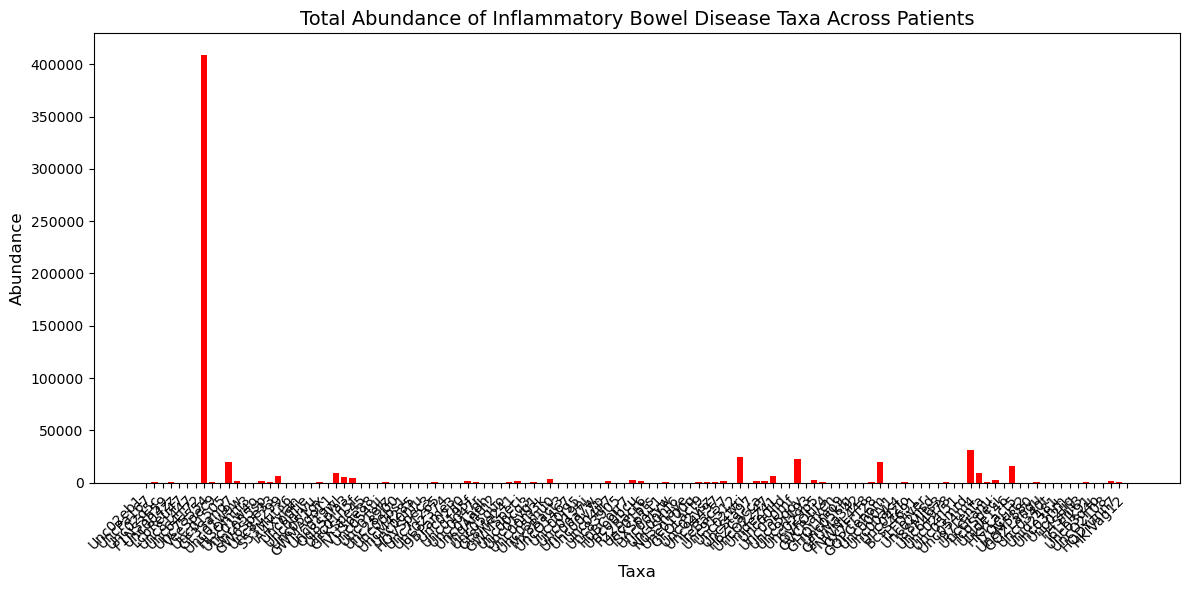

In [166]:
#Sum taxa abundance 
taxa_sums_ibd = ibd_data.iloc[:,1:].sum(axis=0) 

plt.figure(figsize=(12, 6)) 
plt.bar(taxa_sums_ibd.index, taxa_sums_ibd.values, color="red")

#Labels and title
plt.title("Total Abundance of Inflammatory Bowel Disease Taxa Across Patients", fontsize=14)
plt.xlabel("Taxa", fontsize=12)
plt.ylabel("Abundance", fontsize=12)

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [167]:
#Outputting features with definite spikes 
spiked_totals_ibd = taxa_sums_ibd[taxa_sums_ibd > 0]
if not spiked_totals_ibd.empty: 
    sorted_vals_ibd = spiked_totals_ibd.sort_values(ascending = False)
    print(sorted_vals_ibd)

sorted_vals_ibd.to_csv("ibd_sorted", index = False)

Unc64172    409198
Unc05mrd     31009
Unc91512     24879
Unc050mf     22473
Unc01505     19818
             ...  
HJ3Omni3         2
I7QCurt2         2
GVFOtit4         2
Unc01bts         2
Unc00lld         1
Length: 119, dtype: int64


Normalization of data using total sum normalization 

In [168]:
#Relative Abundance Normalization for HMP data (Total Sum)
patientID_hmp = hmp_data[["Patient ID"]]
abun_hmp = hmp_data.iloc[:,1:121]

row_sum_hmp = abun_hmp.sum(axis = 1)
normalized_hmp_abun = abun_hmp / row_sum_hmp.values[:, None]
normalized_hmp_data = pd.concat([patientID_hmp, normalized_hmp_abun], axis = 1)

#normalized_hmp_data.to_csv("normalized_hmp_data.csv", index = False)

#IBD data 
patientID_ibd = ibd_data[["Patient ID"]]
abun_ibd = ibd_data.iloc[:, 1:]

row_sum_ibd = abun_ibd.sum(axis = 1)
normalized_ibd_abun = abun_ibd / row_sum_ibd.values[:, None]
normalized_ibd_data = pd.concat([patientID_ibd, normalized_ibd_abun], axis = 1)

#normalized_ibd_data.to_csv("normalized_ibd_data.csv", index = False)

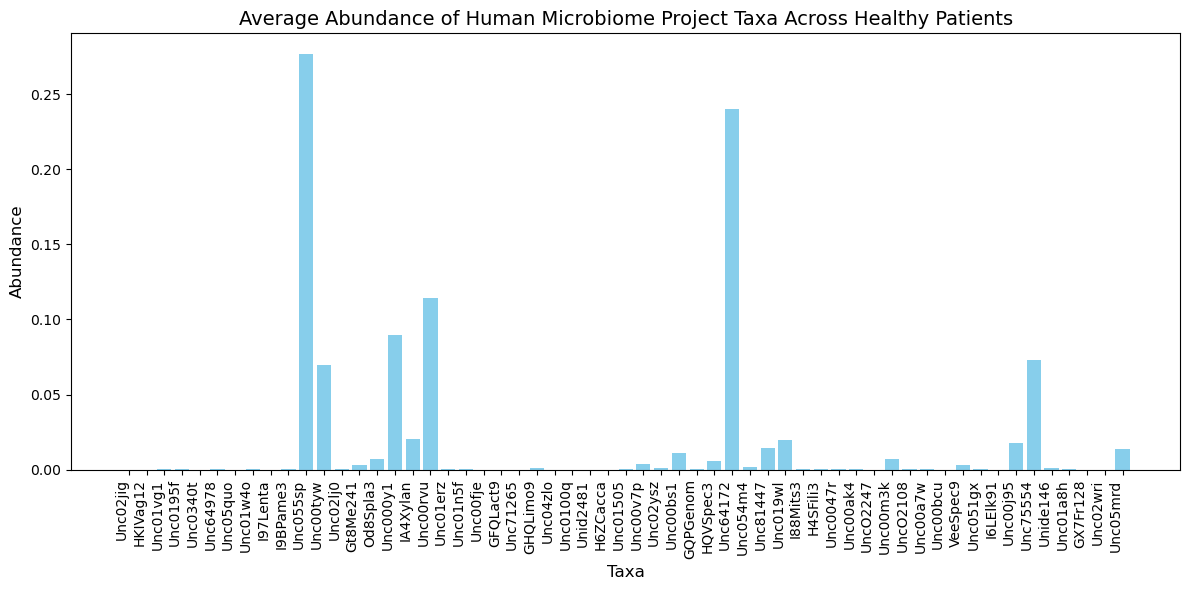

Unc055sp    2.766895e-01
Unc64172    2.403289e-01
Unc00rvu    1.142210e-01
Unc000y1    8.969243e-02
Unc75554    7.320975e-02
Unc00tyw    6.955704e-02
IA4Xylan    2.019525e-02
Unc019wl    1.998495e-02
Unc00j95    1.740115e-02
Unc81447    1.468541e-02
Unc05mrd    1.385925e-02
Unc00bs1    1.090163e-02
Unc00m3k    7.248066e-03
Od8Spla3    6.790932e-03
HQVSpec3    5.914415e-03
Unc00v7p    3.804058e-03
VeeSpec9    2.858985e-03
Gt8Me241    2.837972e-03
Unc054m4    1.665902e-03
Unide146    9.000781e-04
Unc02ysz    7.647316e-04
GHQLimo9    7.321623e-04
Unc051gx    7.070415e-04
I88Mits3    6.182461e-04
H4SFili3    4.470796e-04
Unc01w4o    3.870042e-04
Unc01a8h    3.702606e-04
Unc02lj0    3.268445e-04
Unc00a7w    2.809099e-04
Unc00ak4    2.773806e-04
Unc0047r    2.740707e-04
Unc01505    2.149391e-04
Unc64978    2.123853e-04
I9BPame3    1.835803e-04
Unc01n5f    1.613670e-04
GQPGenom    1.495236e-04
Unc01vg1    1.354595e-04
UncO2108    7.302854e-05
Unc0195f    6.786915e-05
Unc01erz    6.558311e-05


count    5.700000e+01
mean     1.753372e-02
std      5.173560e-02
min      1.034947e-07
25%      2.736616e-05
50%      2.809099e-04
75%      5.914415e-03
max      2.766895e-01
dtype: float64

In [185]:
#Normalized graphs - averaged taxa abundances
taxa_mean_hmp = normalized_hmp_abun.iloc[:, 1:121].mean(axis = 0)  
taxa_mean_hmp = taxa_mean_hmp[taxa_mean_hmp != 0]

plt.figure(figsize=(12, 6))
plt.bar(taxa_mean_hmp.index, taxa_mean_hmp.values, color="skyblue")

#Labels and title
plt.title("Average Abundance of Human Microbiome Project Taxa Across Healthy Patients", fontsize = 14)
plt.xlabel("Taxa", fontsize = 12)
plt.ylabel("Abundance", fontsize = 12)

# Rotate x-axis labels if they overlap
plt.xticks(rotation = 90, ha = "right")

plt.tight_layout()
plt.show()

sorted_hmp = taxa_mean_hmp.sort_values(ascending = False)
print(sorted_hmp)
sorted_hmp.describe()

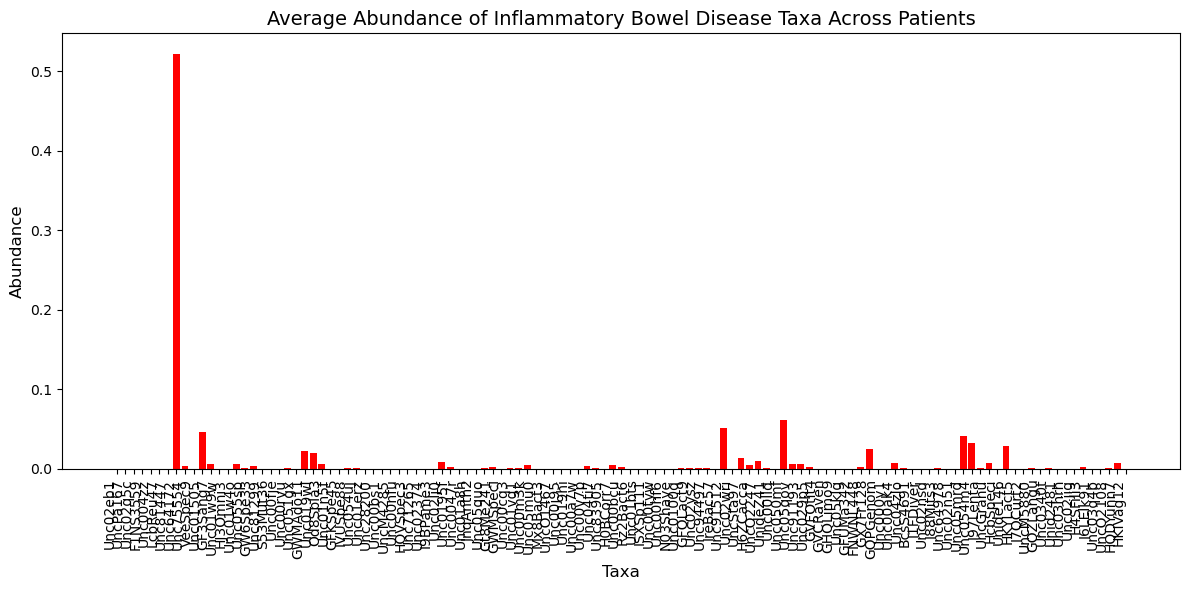

Unc64172    5.217703e-01
Unc050mf    6.109099e-02
Unc91512    5.197055e-02
Unc01505    4.697070e-02
Unc05mrd    4.176133e-02
                ...     
Unc000y1    2.852062e-06
GVFOtit4    2.688671e-06
Unc02374    2.124267e-06
HJ3Omni3    1.422336e-06
Unc00lld    6.593097e-07
Length: 119, dtype: float64


In [170]:
#Averaged taxa abundance - IBD 
taxa_mean_ibd = normalized_ibd_data.iloc[:,1:].mean(axis = 0)  
taxa_mean_ibd = taxa_mean_ibd[taxa_mean_ibd != 0]

plt.figure(figsize=(12, 6))
plt.bar(taxa_mean_ibd.index, taxa_mean_ibd.values, color="red")

#Labels and title
plt.title("Average Abundance of Inflammatory Bowel Disease Taxa Across Patients", fontsize = 14)
plt.xlabel("Taxa", fontsize = 12)
plt.ylabel("Abundance", fontsize = 12)

# Rotate x-axis labels if they overlap
plt.xticks(rotation = 90, ha = "right")

plt.tight_layout()
plt.show()

sorted_ibd = taxa_mean_ibd.sort_values(ascending = False)
print(sorted_ibd)

Statistical Techniques - Shannon and Simpson Index, Mann-Whitney U test

In [187]:
#Shannon Index 
def shannon_index(proportions): 
    proportions = proportions[proportions > 0]
    return -np.sum(proportions * np.log(proportions))

hmp_data["Shannon_Index"] = hmp_data.iloc[:,1:121].apply(shannon_index, axis = 1)
ibd_data["Shannon_Index"] = normalized_ibd_data.iloc[:,1:].apply(shannon_index, axis = 1)

hmp_indices = hmp_data["Shannon_Index"]
ibd_indices = ibd_data["Shannon_Index"]

t_stat, p_value = ttest_ind(hmp_indices, ibd_indices)
print(f"\nT-test result: t-statistic = {t_stat:.2f}, p-value = {p_value:.2e}")

print(hmp_data['Shannon_Index'].describe())
print(ibd_data['Shannon_Index'].describe())



T-test result: t-statistic = -29.83, p-value = 3.34e-106
count    248.000000
mean       0.020007
std        0.015591
min        0.000170
25%        0.009477
50%        0.017338
75%        0.026714
max        0.100504
Name: Shannon_Index, dtype: float64
count    178.000000
mean       1.061093
std        0.549472
min       -0.000000
25%        0.616191
50%        1.072989
75%        1.502890
max        2.197785
Name: Shannon_Index, dtype: float64


In [173]:
#Simpson Index 
def simpson_index(abundance_data): 
    total_individuals = abundance_data.sum(axis = 1)
    simpson_indices = 1 - (abundance_data ** 2).sum(axis = 1) / (total_individuals ** 2)
    return simpson_indices 

hmp_simpson = simpson_index(hmp_data.iloc[:,1:121]) 
ibd_simpson = simpson_index(normalized_ibd_data.iloc[:, 1:]) 

simpson_t_stat, simpson_p_value = ttest_ind(hmp_simpson, ibd_simpson)

print(f"Simpson Index T-test: t-statistic = {simpson_t_stat:.3f}, p-value = {simpson_p_value:.3e}")
print(hmp_simpson.mean(), ibd_simpson.mean())

#Research more about simpson index and what that means for our dataset 

Simpson Index T-test: t-statistic = 1.867, p-value = 6.258e-02
0.5087587478122174 0.46757295871818444


In [175]:
#Collapse abundance into 1D matrix to find overall significant difference in distribution 
stat, p_value = mannwhitneyu(
    hmp_data.iloc[:, 1:121].values.ravel(),
    ibd_data.iloc[:, 1:].values.ravel()
)
print(f'Mann-Whitney U statistic: {stat}')
print(f'p-value: {p_value}')


Mann-Whitney U statistic: 296320309.0
p-value: 1.3324361414924386e-173


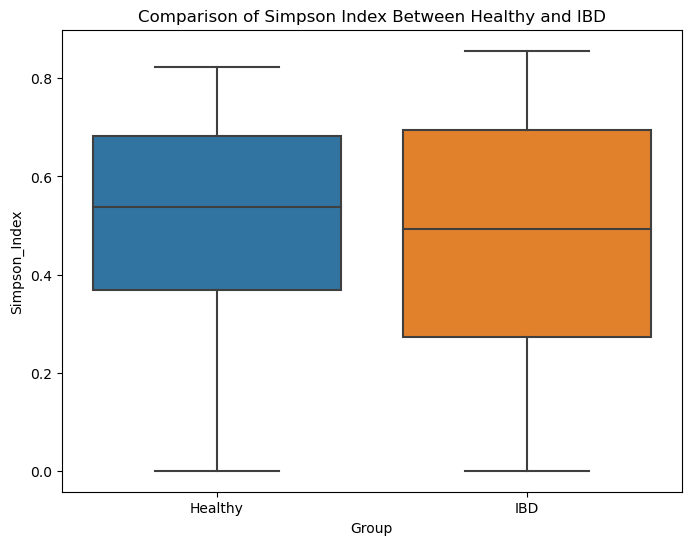

In [176]:
#Possible figure 
df_simp = pd.DataFrame({
    'Simpson_Index': hmp_simpson.tolist() + ibd_simpson.tolist(),
    'Group': ['Healthy'] * len(hmp_simpson) + ['IBD'] * len(ibd_simpson)
})


plt.figure(figsize = (8, 6))
sns.boxplot(x = 'Group', y = 'Simpson_Index', data = df_simp)
plt.title('Comparison of Simpson Index Between Healthy and IBD')
plt.show()


Averaged taxa abundance visualization and statistical analysis for HMP/IBD-QIIME2

In [178]:
#Final Normalized Data 
hmp_final = pd.read_csv("normalized_hmp_final.csv")
hmp_final.head()

,Patient ID,Abiotrophia,Acidaminococcus,Acinetobacter,Actinomyces,Adlercreutzia,Aerococcus,Aggregatibacter,Akkermansia,Alistipes,...,Stomatobaculum,Streptococcus,Subdoligranulum,Sutterella,Tannerella,Treponema,Turicella,Turicibacter,Varibaculum,Veillonella
0,SRS011061,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000910,0.069059,...,0.0,0.000292,0.000286,0.000000,0.0,0.0,0.0,0.0,0.0,0.000170
1,SRS011084,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.001770,0.134723,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,SRS011134,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.007958,0.088716,...,0.0,0.006499,0.000578,0.002353,0.0,0.0,0.0,0.0,0.0,0.001242
3,SRS011239,0.0,0.003441,0.0,0.0,0.00007,0.0,0.0,0.002077,0.098832,...,0.0,0.000190,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,SRS011271,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.035644,...,0.0,0.001128,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000389


In [179]:
ibd_final = pd.read_csv("normalized_ibd_final.csv")
ibd_final.head()

,Patient ID,Abiotrophia,Acidaminococcus,Acinetobacter,Actinomyces,Adlercreutzia,Aerococcus,Aggregatibacter,Akkermansia,Alistipes,...,Stomatobaculum,Streptococcus,Subdoligranulum,Sutterella,Tannerella,Treponema,Turicella,Turicibacter,Varibaculum,Veillonella
0,206534,0.000000,0.0,0.00000,0.000537,0.0,0.000000,0.000507,0.000149,0.003817,...,0.000000,0.014373,0.010079,0.143547,0.0,0.000775,0.0,0.0,0.0,0.011093
1,206536,0.000000,0.0,0.00007,0.000834,0.0,0.000000,0.001217,0.000000,0.006604,...,0.000000,0.003754,0.011019,0.149362,0.0,0.000000,0.0,0.0,0.0,0.007751
2,206538,0.000000,0.0,0.00000,0.003397,0.0,0.000000,0.002650,0.000000,0.006250,...,0.000747,0.014403,0.011074,0.143624,0.0,0.000000,0.0,0.0,0.0,0.022624
3,206547,0.000365,0.0,0.00000,0.005943,0.0,0.000261,0.000000,0.000000,0.000000,...,0.000000,0.056827,0.048642,0.000000,0.0,0.000000,0.0,0.0,0.0,0.041969
4,206548,0.000000,0.0,0.00000,0.000789,0.0,0.000000,0.000000,0.000000,0.000789,...,0.000000,0.016091,0.015302,0.000000,0.0,0.000000,0.0,0.0,0.0,0.020035


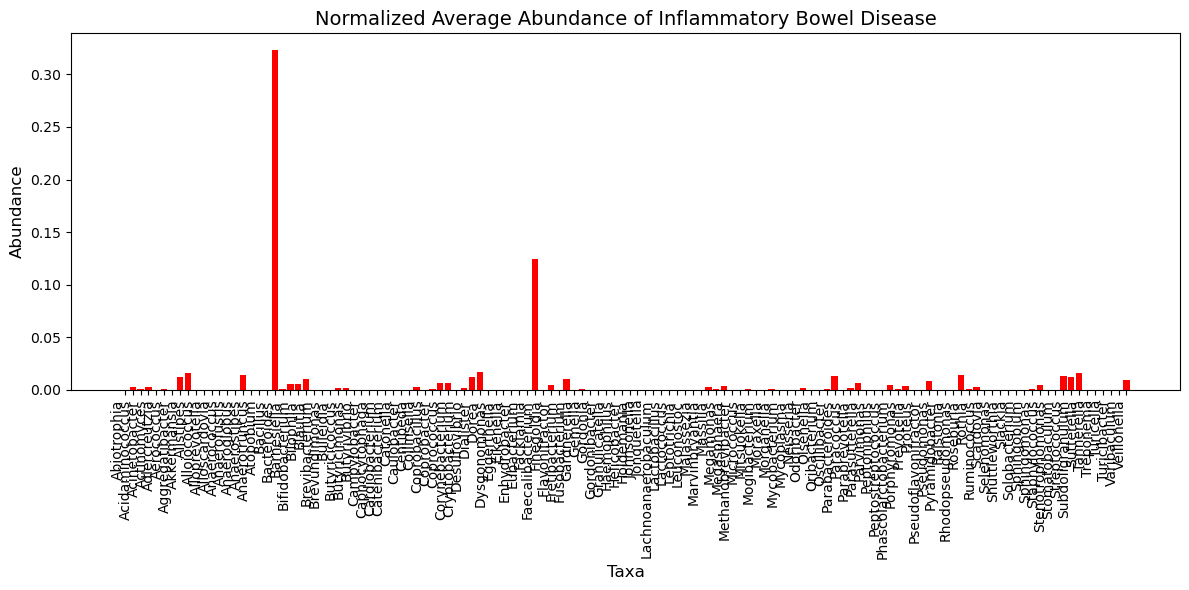

Bacteroides         3.228042e-01
Faecalibacterium    1.245214e-01
Dorea               1.752814e-02
Alistipes           1.640156e-02
Sutterella          1.602125e-02
                        ...     
Paracoccus          7.632825e-07
Turicella           6.974306e-07
Bulleidia           6.138189e-07
Cryptobacterium     5.514669e-07
Fretibacterium      2.708373e-07
Length: 128, dtype: float64


In [181]:
#Normalized IBD graphs final 
taxa_mean_ibd_final = ibd_final.iloc[:,1:].mean(axis=0)  
taxa_mean_ibd_final = taxa_mean_ibd_final[taxa_mean_ibd_final != 0]

plt.figure(figsize=(12, 6))
plt.bar(taxa_mean_ibd_final.index, taxa_mean_ibd_final.values, color="red")

#Labels and title
plt.title("Normalized Average Abundance of Inflammatory Bowel Disease", fontsize=14)
plt.xlabel("Taxa", fontsize=12)
plt.ylabel("Abundance", fontsize=12)

# Rotate x-axis labels if they overlap
plt.xticks(rotation=90, ha="right")

plt.tight_layout()
plt.show()


sorted_ibd_vals = taxa_mean_ibd_final.sort_values(ascending = False)
print(sorted_ibd_vals)

In [182]:
#Shannon Index - Final 
def shannon_index(proportions): 
    proportions = proportions[proportions > 0]
    return -np.sum(proportions * np.log(proportions))

hmp_final["Shannon_Index"] = hmp_final.iloc[:,1:].apply(shannon_index, axis = 1)
ibd_final["Shannon_Index"] = ibd_final.iloc[:,1:].apply(shannon_index, axis = 1)

hmp_indices = hmp_final["Shannon_Index"]
ibd_indices = ibd_final["Shannon_Index"]

t_stat, p_value = ttest_ind(hmp_indices, ibd_indices)
print(f"\nT-test result: t-statistic = {t_stat:.2f}, p-value = {p_value:.2e}")

print(hmp_final['Shannon_Index'].describe())
print(ibd_final['Shannon_Index'].describe())



T-test result: t-statistic = -5.90, p-value = 7.36e-09
count    248.000000
mean       1.103643
std        0.483886
min        0.120356
25%        0.712946
50%        1.081153
75%        1.437984
max        2.386882
Name: Shannon_Index, dtype: float64
count    178.000000
mean       1.369022
std        0.418492
min        0.035558
25%        1.083776
50%        1.439786
75%        1.707093
max        2.111505
Name: Shannon_Index, dtype: float64


In [183]:
#Simpson Index - Final 
def simpson_index(abundance_data): 
    total_individuals = abundance_data.sum(axis = 1)
    simpson_indices = 1 - (abundance_data ** 2).sum(axis = 1) / (total_individuals ** 2)
    return simpson_indices 

hmp_simpson = simpson_index(hmp_final.iloc[:, 1:]) 
ibd_simpson = simpson_index(ibd_final.iloc[:, 1:]) 

simpson_t_stat, simpson_p_value = ttest_ind(hmp_simpson, ibd_simpson)

print(f"Simpson Index T-test: t-statistic = {simpson_t_stat:.3f}, p-value = {simpson_p_value:.3e}")
print(hmp_simpson.mean(), ibd_simpson.mean())



Simpson Index T-test: t-statistic = 7.664, p-value = 1.237e-13
0.563133460990335 0.5157093666017553


In [184]:
#Simpson Index - Final
#Collapse abundance into 1D matrix to find overall significant difference in distribution 
stat, p_value = mannwhitneyu(
    hmp_final.iloc[:, 1:].values.ravel(),
    ibd_final.iloc[:, 1:].values.ravel()
)
print(f'Mann-Whitney U statistic: {stat}')
print(f'p-value: {p_value}')


Mann-Whitney U statistic: 346911812.0
p-value: 4.72746016965212e-60
